In [1]:
from __future__ import print_function, unicode_literals, division

import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('axes', linewidth=2)

fs_axlabel = 12
fw_axlabel = 'bold'

In [2]:
df = pd.read_csv('sent.csv', index_col='idx')

df = df.dropna(how='any', subset=['date'])
 

dt = [x[:-6] for x in df['date']]
tz = [x[-6:] for x in df['date']]

tz = [x.replace(':','') for x in tz]

dates = []

for x in df.date:
    
    dt = x[:-6]
    tz = x[-6:].replace(':','')
    
    dtz = '{} {}'.format(dt, tz)
    
    dates.append(datetime.strptime(dtz, '%Y-%m-%d %H:%M:%S %z'))

df['dt']  = dates

df['tz']  = [x.tzinfo for x in dates]

df['utc'] = [x.time() for x in dates]
    
df['day'] = [x.weekday() for x in dates]

### Day of the week

What days of the week are most emails sent?

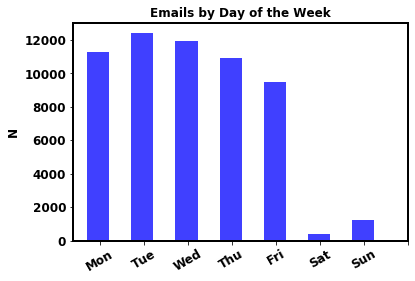

In [3]:
fig0, ax0 = plt.subplots(1, 1, figsize=(6,4))

ax = ax0

nbins = 7

n, bins, patches = ax.hist(df['day'], nbins, facecolor='blue', rwidth=0.5, alpha=0.75)

ax.set_xticks(bins+0.45)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                    fontsize=fs_axlabel, fontweight=fw_axlabel,
                    rotation=30)

ax.set_title('Emails by Day of the Week', fontsize=fs_axlabel, fontweight=fw_axlabel)
ax.set_ylabel('N', fontsize=fs_axlabel, fontweight=fw_axlabel)



for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')

plt.savefig('figs/day_of_week.png', format='png', dpi=72)

plt.show()

### Time of the day (UTC)

What time of the day are emails typically sent? Need to convert to PST and correct for DST...

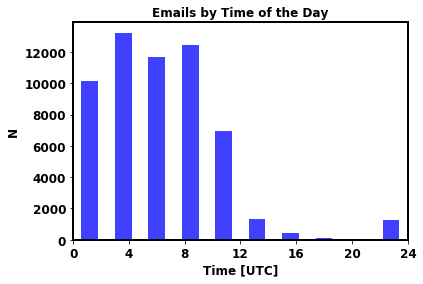

In [4]:
fig1, ax1 = plt.subplots(1, 1, figsize=(6,4))

ax = ax1

nbins = 10

n, bins, patches = ax.hist(df['utc'], nbins, facecolor='blue', rwidth=0.5, alpha=0.75)


ax.set_xlim(0,24*3600)

xt = [x * 3600 for x in range(0, 25, 4)]
yt = ['{}'.format(x) for x in range(0, 25, 4)]

ax.set_xticks(xt)
ax.set_xticklabels(yt,
                    fontsize=fs_axlabel, fontweight=fw_axlabel,
                    rotation=0)

#ax.set_xlim(datetime.time(0,0,0,0), datetime.time(23,59,59,999999))

ax.set_xlabel('Time [UTC]', fontsize=fs_axlabel, fontweight=fw_axlabel)
ax.set_ylabel('N', fontsize=fs_axlabel, fontweight=fw_axlabel)

ax.set_title('Emails by Time of the Day', fontsize=fs_axlabel, fontweight=fw_axlabel)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs_axlabel)
    tick.label1.set_fontweight('bold')

plt.savefig('figs/time_of_day.png', format='png', dpi=72)

plt.show()

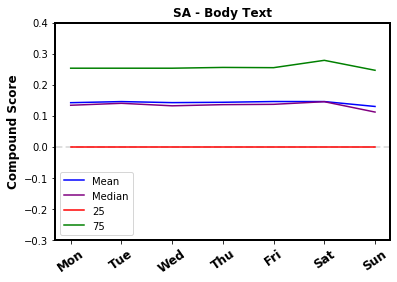

In [5]:
fig2, ax2 = plt.subplots(1, 1, figsize=(6,4))

ax = ax2

# Mean
y1 = df.groupby('day')['body_comp'].mean()
# Median
y2 = df.groupby('day')['body_comp'].median()
# Min
#y3 = df.groupby('day')['body_comp'].min()
# Max
#y4 = df.groupby('day')['body_comp'].max()

y5 = df.groupby('day')['body_comp'].quantile(0.25)
y6 = df.groupby('day')['body_comp'].quantile(0.75)


ax.axhline(0, color='grey', alpha=0.25, linewidth=2, linestyle='--')


ax.plot(y1.index, y1.values, color='blue', label='Mean')
ax.plot(y2.index, y2.values, color='purple', label='Median')
ax.plot(y5.index, y5.values, color='red', label='25')
ax.plot(y6.index, y6.values, color='green', label='75')

ax.set_ylim(-0.3,0.4)

ax.set_xticks(y1.index)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                    fontsize=fs_axlabel, fontweight=fw_axlabel,
                    rotation=35)

ax.set_ylabel('Compound Score', fontsize=fs_axlabel, fontweight=fw_axlabel)

ax.set_title('SA - Body Text', fontsize=fs_axlabel, fontweight=fw_axlabel)

plt.legend(loc=3)

plt.savefig('figs/tone_by_day.png', format='png', dpi=72)

plt.show()

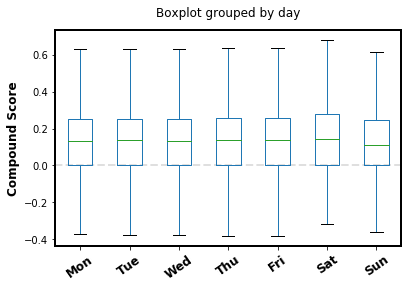

In [6]:
fig3, ax3 = plt.subplots(1, 1, figsize=(6,4))

ax = ax3

ax.axhline(0, color='grey', alpha=0.25, linewidth=2, linestyle='--')

boxplot = df.boxplot(ax=ax, column=['body_comp'], by='day', grid=False,
                     showfliers=False)

ax.set_xlabel(None)
#ax.set_xlabel('Day of the Week', fontsize=fs_axlabel, fontweight=fw_axlabel)
ax.set_ylabel('Compound Score', fontsize=fs_axlabel, fontweight=fw_axlabel)

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                    fontsize=fs_axlabel, fontweight=fw_axlabel,
                    rotation=35)

ax.set_title(None)

plt.savefig('figs/boxplot_tone_by_day.png', format='png', dpi=72)

plt.show()